In [36]:
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

In [18]:
path = Path("../storage/data/bears")

In [19]:
#invalid = verify_images(list(path.glob("**/*.*")))
#for x in invalid:
#    x.unlink()

In [53]:
block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms(),
    splitter = RandomSplitter(seed = 42)
)
dls = block.dataloaders(path)

In [54]:
#dls.show_batch(unique = True)

In [55]:
learner = cnn_learner(dls, resnet18, metrics = error_rate)
learner.fine_tune(4)

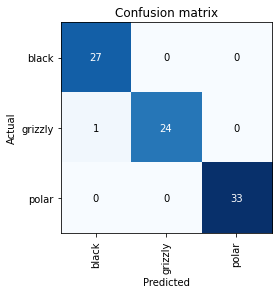

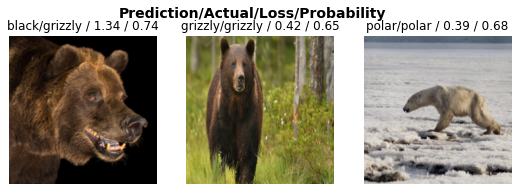

In [56]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()
interp.plot_top_losses(3)

In [51]:
clean = False
cleaner = None

if clean:
    cleaner = ImageClassifierCleaner(learner)
    cleaner

In [52]:
if clean:
    for idx in cleaner.delete():
        cleaner.fns[idx].unlink()

    for idx, cat in cleaner.change():
        shutil.move(cleaner.fns[idx], path/cat)

In [57]:
learner.export('bears.pkl')

In [58]:
Path().ls()

(#3) [Path('Untitled.ipynb'),Path('.ipynb_checkpoints'),Path('bears.pkl')]